In [25]:
import os

In [26]:
import pandas as pd

In [27]:
import geopandas as gpd


In [28]:
import rtree

In [29]:
import s3fs

In [30]:
import geopandas as gpd

Pour visualiser

In [35]:
import btbpy as btb
from shapely.geometry import Polygon
from shapely.geometry import Point #pour créer le géopandas à partir de points
import matplotlib.pyplot as plt
import contextily as cx

In [36]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})

Pour mémoire télécharger un fichier sur une ville correspond au code suivant : 
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
fs.get('projet-funathon/diffusion/data/paris/2021-04-10/reviews.csv.gz', 'reviews.csv.gz')
df_paris_reviews = pd.read_csv('reviews.csv.gz',compression='gzip')

Téléchargement de toutes les données

In [37]:
liste_villes=['paris', 'lyon', 'bordeaux'] # liste complète : ['paris', 'lyon', 'bordeaux']

In [38]:
liste_fichiers=['listings', 'reviews']
dicodate={"lyon" : "2021-04-18", 'paris' : '2021-04-10', 'bordeaux' : '2021-04-18'}
dicocodescommunes={"lyon" : "69123", 'paris' : '75056', 'bordeaux' : '33063'}

paris
paris : listings
                 id     scrape_id       host_id  host_listings_count  \
count  6.309000e+04  6.309000e+04  6.309000e+04         61336.000000   
mean   2.432116e+07  2.021041e+13  8.874855e+07            11.959143   
std    1.451113e+07  0.000000e+00  1.061083e+08            74.242135   
min    2.577000e+03  2.021041e+13  2.626000e+03             0.000000   
25%    1.171491e+07  2.021041e+13  1.292643e+07             1.000000   
50%    2.383585e+07  2.021041e+13  3.754633e+07             1.000000   
75%    3.734861e+07  2.021041e+13  1.321578e+08             2.000000   
max    4.913572e+07  2.021041e+13  3.970766e+08          1548.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               61336.000000                           0.0  63090.000000   
mean                   11.959143                           NaN     48.864103   
std                    74.242135                           NaN      0.018366   
min     

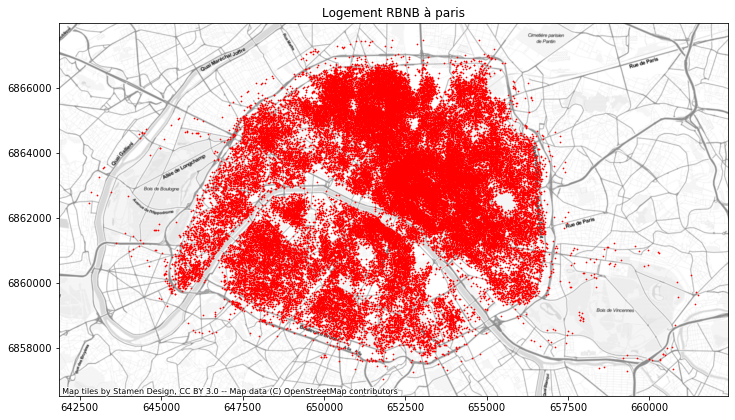

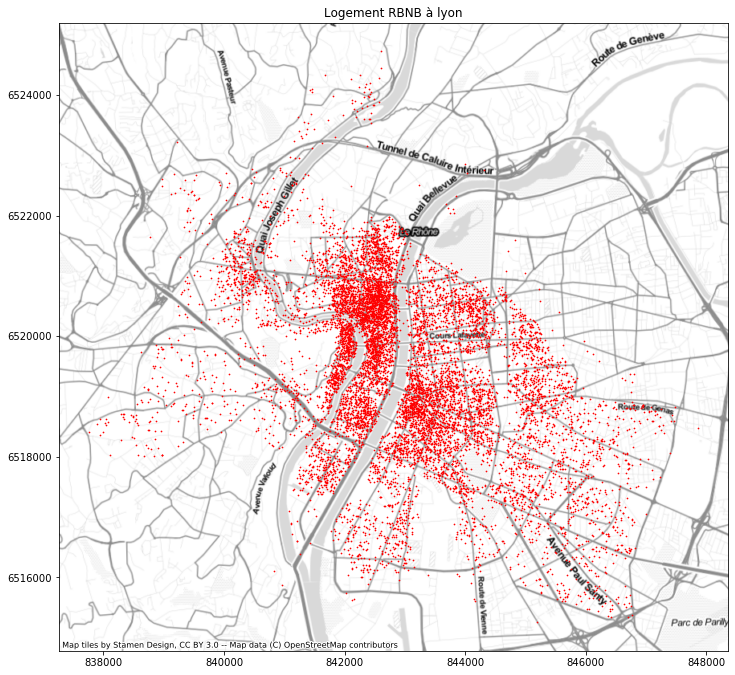

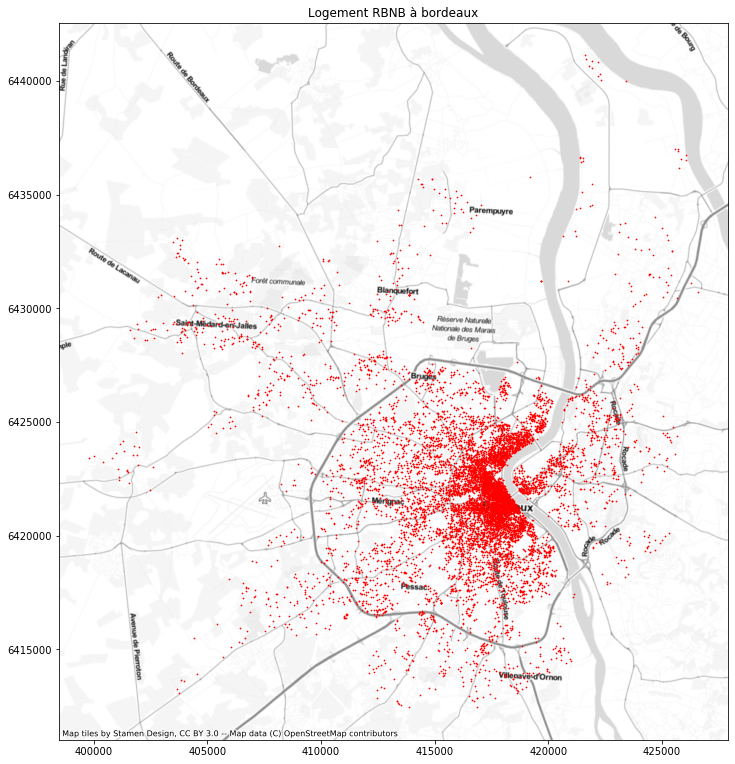

In [131]:
for ville in liste_villes :
    print (ville)
    for fichier in liste_fichiers :
        chemin_fichier= 'projet-funathon/diffusion/data/' + ville + '/' +  dicodate[ville]     + '/' + fichier + '.csv.gz'
        nomfichierpython= fichier + '.csv.gz'
        fs.get(chemin_fichier, nomfichierpython)
        #df_paris_reviews = pd.read_csv('reviews.csv.gz',compression='gzip')
        globals()["df" + "_" + ville + "_" +fichier] = pd.read_csv(nomfichierpython,compression='gzip')
        print ( ville + " : " + fichier)
        print((globals()["df" + "_" + ville + "_" +fichier]).describe())
        print((globals()["df" + "_" + ville + "_" +fichier]).head(5))
        if fichier=="listings" : 
            geometry = [Point(xy) for xy in zip((globals()["df" + "_" + ville + "_" + fichier]).longitude, (globals()["df" + "_" + ville + "_" + fichier]).latitude)]
            globals()["geodf" + "_" + ville + "_" + fichier]= gpd.GeoDataFrame(globals()["df" + "_" + ville + "_" + fichier], crs=4326, geometry=geometry)
            globals()["geodf" + "_" + ville + "_" + fichier] = (globals()["geodf" + "_" + ville + "_" + fichier]).to_crs("epsg:2154")
            
            ax = globals()["geodf" + "_" + ville + "_" + fichier].plot(markersize=0.5, figsize=(12,14), color='red') #figsize définit la taille de la carte
            cx.add_basemap(ax, crs=2154, source=cx.providers.Stamen.TonerLite)
            ax.set_title("Logement RBNB à " + ville)
            print((globals()["geodf" + "_" + ville + "_" + fichier]).crs)
            

Import des données DVF

In [104]:
 fs.get('projet-funathon/diffusion/data/dvf/dvf.csv', 'dvf.csv')

[None]

In [105]:
df_dvf = pd.read_csv('dvf.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,18,19,21,23,25,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
 df_dvf.head()

Unnamed: 0   id_mutation date_mutation  numero_disposition nature_mutation  \
0           0  2016-1233996    2016-01-12                   1           Vente   
1           1  2016-1233999    2016-01-14                   1           Vente   
2           2  2016-1234000    2016-01-15                   1           Vente   
3           3  2016-1234001    2016-01-11                   1           Vente   
4           4  2016-1234002    2016-01-14                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  adresse_nom_voie  \
0          62000.0            14.0             NaN       RUE D ALGER   
1         370500.0            15.0             NaN     RUE DU BOULOI   
2         206000.0           148.0             NaN  RUE SAINT HONORE   
3         374100.0            12.0             NaN   RUE DES MOULINS   
4         200000.0           262.0             NaN  RUE SAINT HONORE   

  adresse_code_voie  ...   type_local  surface_reelle_bati  \
0               191  ...   Dépendance                  NaN   
1              1178  ...  Appartement                 46.0   
2              8635  ...  Appartement                 23.0   
3              6603  ...  Appartement                 33.0   
4              8635  ...  Appartement                 18.0   

  nombre_pieces_principales  code_nature_culture  nature_culture  \
0                       0.0                  NaN             NaN   
1                       2.0                  NaN             NaN   
2                       1.0                  NaN             NaN   
3                       2.0                  NaN             NaN   
4                       1.0                  NaN             NaN   

   code_nature_culture_speciale nature_culture_speciale  surface_terrain  \
0                           NaN                     NaN              NaN   
1                           NaN                     NaN              NaN   
2                           NaN                     NaN              NaN   
3                           NaN                     NaN              NaN   
4                           NaN                     NaN              NaN   

  longitude   latitude  
0  2.330206  48.865499  
1  2.340819  48.863798  
2  2.340441  48.862020  
3  2.335280  48.866898  
4  2.333623  48.864394  

[5 rows x 41 columns]

In [107]:
df_dvf.describe()

Unnamed: 0  numero_disposition  valeur_fonciere  adresse_numero  \
count  485634.000000       485634.000000     4.834590e+05   469459.000000   
mean     2772.853694            1.034258     3.422519e+06       76.063856   
std      2961.322677            0.789180     3.024406e+07      470.545879   
min         0.000000            1.000000     1.500000e-01        1.000000   
25%       815.000000            1.000000     1.900000e+05       11.000000   
50%      1848.000000            1.000000     3.600000e+05       29.000000   
75%      3544.750000            1.000000     8.066400e+05       69.000000   
max     17623.000000           62.000000     1.249132e+09     9999.000000   

         code_postal   code_commune  code_departement  ancien_code_commune  \
count  476156.000000  485634.000000     485634.000000                  0.0   
mean    67715.603571   67613.055632         67.452019                  NaN   
std     14435.111101   14726.147384         14.702135                  NaN   
min     33000.000000   33063.000000         33.000000                  NaN   
25%     69006.000000   69386.000000         69.000000                  NaN   
50%     75010.000000   75110.000000         75.000000                  NaN   
75%     75016.000000   75116.000000         75.000000                  NaN   
max     75020.000000   75120.000000         75.000000                  NaN   

       ancien_nom_commune  ancien_id_parcelle  ...  lot4_surface_carrez  \
count                 0.0                 0.0  ...          1093.000000   
mean                  NaN                 NaN  ...           109.438445   
std                   NaN                 NaN  ...           223.956819   
min                   NaN                 NaN  ...             0.700000   
25%                   NaN                 NaN  ...            35.130000   
50%                   NaN                 NaN  ...            66.200000   
75%                   NaN                 NaN  ...           113.240000   
max                   NaN                 NaN  ...          5107.900000   

        lot5_numero  lot5_surface_carrez    nombre_lots  code_type_local  \
count   3913.000000           409.000000  485634.000000    451120.000000   
mean     189.813953           123.971883       1.252744         2.451512   
std      857.254704           164.458349       1.072765         0.695452   
min        2.000000             0.600000       0.000000         1.000000   
25%       24.000000            33.080000       1.000000         2.000000   
50%       47.000000            74.590000       1.000000         2.000000   
75%       94.000000           149.350000       2.000000         3.000000   
max    13247.000000          1680.000000     120.000000         4.000000   

       surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
count        325529.000000              451022.000000     57724.000000   
mean             74.799453                   1.562565       939.648067   
std             314.005143                   1.618539      2206.390581   
min               1.000000                   0.000000         1.000000   
25%              29.000000                   0.000000       177.000000   
50%              48.000000                   1.000000       345.000000   
75%              75.000000                   3.000000       813.000000   
max           48000.000000                  30.000000     90690.000000   

           longitude       latitude  
count  482499.000000  482499.000000  
mean        2.411437      47.635963  
std         1.589762       1.688147  
min        -0.638540      44.811070  
25%         2.293281      45.754510  
50%         2.344949      48.844327  
75%         2.395038      48.870245  
max         4.897842      48.901837  

[8 rows x 23 columns]

In [108]:
df_dvf.columns

Index(['Unnamed: 0', 'id_mutation', 'date_mutation', 'numero_disposition',
       'nature_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',
       'code_postal', 'code_commune', 'nom_commune', 'code_departement',
       'ancien_code_commune', 'ancien_nom_commune', 'id_parcelle',
       'ancien_id_parcelle', 'numero_volume', 'lot1_numero',
       'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez',
       'lot3_numero', 'lot3_surface_carrez', 'lot4_numero',
       'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez',
       'nombre_lots', 'code_type_local', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'code_nature_culture', 'nature_culture',
       'code_nature_culture_speciale', 'nature_culture_speciale',
       'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [109]:
df_dvf.shape

(485634, 41)

Import des données filosophi20215

In [110]:
 fs.get('projet-funathon/diffusion/data/filosofi2015/filosofi.gpkg', 'filosofi.gpkg')

[None]

In [111]:
geodf_filosofi = gpd.read_file('filosofi.gpkg', layer='filosofi', crs='2154')

In [112]:
geodf_filosofi.describe()

I_est_cr         Groupe       I_pauv          Ind          Men  \
count  4068.000000    4068.000000  4068.000000  4068.000000  4068.000000   
mean      0.082842  723749.555064     0.000246   716.763151   352.277704   
std       0.275677  146475.083195     0.015679   631.708197   313.677911   
min       0.000000   87899.000000     0.000000     1.000000     0.300000   
25%       0.000000  589455.750000     0.000000   213.375000   100.000000   
50%       0.000000  852038.500000     0.000000   507.500000   248.000000   
75%       0.000000  859236.250000     0.000000  1131.625000   555.000000   
max       1.000000  869884.000000     1.000000  4033.500000  1546.000000   

          Men_pauv     Men_1ind     Men_5ind     Men_prop      Men_fmp  ...  \
count  4068.000000  4068.000000  4068.000000  4068.000000  4068.000000  ...   
mean     51.318732   168.393756    20.471706   123.789995    33.997935  ...   
std      52.768724   163.360553    23.204195   121.433612    32.216747  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      11.000000    41.000000     5.000000    29.000000     9.000000  ...   
50%      35.000000   111.000000    13.000000    84.000000    24.000000  ...   
75%      77.000000   258.000000    29.000000   193.000000    51.000000  ...   
max     425.000000   864.000000   224.000000   664.000000   219.000000  ...   

         Ind_18_24    Ind_25_39    Ind_40_54    Ind_55_64    Ind_65_79  \
count  4068.000000  4068.000000  4068.000000  4068.000000  4068.000000   
mean     37.392109   181.485398   144.583948    78.902729    81.954794   
std      33.371133   177.621693   130.495931    72.372106    76.223529   
min       0.000000     0.100000     0.100000     0.000000     0.000000   
25%      10.000000    42.000000    42.000000    23.000000    22.000000   
50%      29.000000   119.000000    98.000000    53.000000    55.000000   
75%      58.000000   276.000000   229.000000   125.000000   131.000000   
max     235.500000  1002.000000   823.000000   539.000000   498.000000   

           Ind_80p      Ind_inc    I_est_1km  index_right         surf  
count  4068.000000  4068.000000  4068.000000  4068.000000  4068.000000  
mean     35.388471    20.048673     0.004425     1.323992    78.782952  
std      34.130616    29.658180     0.066380     0.794773    28.287984  
min       0.000000     0.000000     0.000000     0.000000    47.980000  
25%       9.000000     5.000000     0.000000     1.000000    47.980000  
50%      24.000000    13.000000     0.000000     2.000000   105.400000  
75%      55.000000    30.000000     0.000000     2.000000   105.400000  
max     232.000000  1149.000000     1.000000     2.000000   105.400000  

[8 rows x 34 columns]

In [113]:
geodf_filosofi.columns

Index(['IdINSPIRE', 'Id_carr1km', 'I_est_cr', 'Id_carr_n', 'Groupe', 'Depcom',
       'I_pauv', 'Id_car2010', 'Ind', 'Men', 'Men_pauv', 'Men_1ind',
       'Men_5ind', 'Men_prop', 'Men_fmp', 'Ind_snv', 'Men_surf', 'Men_coll',
       'Men_mais', 'Log_av45', 'Log_45_70', 'Log_70_90', 'Log_ap90', 'Log_inc',
       'Log_soc', 'Ind_0_3', 'Ind_4_5', 'Ind_6_10', 'Ind_11_17', 'Ind_18_24',
       'Ind_25_39', 'Ind_40_54', 'Ind_55_64', 'Ind_65_79', 'Ind_80p',
       'Ind_inc', 'I_est_1km', 'index_right', 'code', 'libelle', 'cheflieu',
       'tncc', 'dct', 'dar', 'dau10', 'typo_au10', 'duu10', 'z10', 'epc', 'bv',
       'cdcte', 'dep', 'reg', 'surf', 'geometry'],
      dtype='object')

In [114]:
geodf_filosofi['Depcom'].value_counts()

33063    757
75116    203
75115    178
69389    165
69388    154
        ... 
93048      1
69149      1
93045      1
33056      1
92073      1
Name: Depcom, Length: 81, dtype: int64

In [115]:
geodf_bordeaux_filosofi = geodf_filosofi.loc[geodf_filosofi['Depcom'].str.slice(stop=2)=='33',:]

In [116]:
geodf_lyon_filosofi = geodf_filosofi.loc[geodf_filosofi['Depcom'].str.slice(stop=2)=='69',:]

In [117]:
geodf_paris0_filosofi = geodf_filosofi.loc[geodf_filosofi['Depcom'].str.slice(stop=2) !='33' ,:]

In [118]:
geodf_paris_filosofi = geodf_paris0_filosofi.loc[geodf_filosofi['Depcom'].str.slice(stop=2) !='69' ,:]

In [119]:
geodf_paris_filosofi.head()

IdINSPIRE                       Id_carr1km  I_est_cr  \
0  CRS3035RES200mN2893400E3763200  CRS3035RES1000mN2893000E3763000         0   
1  CRS3035RES200mN2890000E3762200  CRS3035RES1000mN2890000E3762000         0   
2  CRS3035RES200mN2893400E3762400  CRS3035RES1000mN2893000E3762000         0   
3  CRS3035RES200mN2891800E3763600  CRS3035RES1000mN2891000E3763000         0   
4  CRS3035RES200mN2890800E3763200  CRS3035RES1000mN2890000E3763000         0   

                         Id_carr_n  Groupe Depcom  I_pauv  \
0  CRS3035RES1000mN2893000E3763000  866132  75119       0   
1   CRS3035RES200mN2890000E3762200  862504  75111       0   
2  CRS3035RES1000mN2893000E3762000  866107  75119       0   
3   CRS3035RES200mN2891800E3763600  862421  75119       0   
4   CRS3035RES200mN2890800E3763200  862464  75120       0   

                       Id_car2010     Ind    Men  ...  typo_au10  duu10   z10  \
0  CRS3035RES200mN2893400E3763200  2818.5  990.0  ...        111  00851  1101   
1  CRS3035RES200mN2890000E3762200  1543.5  926.0  ...        111  00851  1101   
2  CRS3035RES200mN2893400E3762400  1338.0  508.0  ...        111  00851  1101   
3  CRS3035RES200mN2891800E3763600  1235.5  633.0  ...        111  00851  1101   
4  CRS3035RES200mN2890800E3763200   685.0  349.0  ...        111  00851  1101   

         epc     bv  cdcte  dep  reg   surf  \
0  200054781  75056    75C   75   11  105.4   
1  200054781  75056    75C   75   11  105.4   
2  200054781  75056    75C   75   11  105.4   
3  200054781  75056    75C   75   11  105.4   
4  200054781  75056    75C   75   11  105.4   

                                            geometry  
0  POLYGON ((654521.895 6866162.148, 654503.215 6...  
1  POLYGON ((653843.375 6862684.192, 653824.700 6...  
2  POLYGON ((653725.054 6866085.739, 653706.372 6...  
3  POLYGON ((655069.741 6864608.596, 655051.064 6...  
4  POLYGON ((654764.705 6863575.557, 654746.030 6...  

[5 rows x 55 columns]

In [120]:
geodf_bordeaux_filosofi.head()

IdINSPIRE                       Id_carr1km  \
2157  CRS3035RES200mN2474800E3485600  CRS3035RES1000mN2474000E3485000   
2158  CRS3035RES200mN2474800E3487000  CRS3035RES1000mN2474000E3487000   
2159  CRS3035RES200mN2474800E3483000  CRS3035RES1000mN2474000E3483000   
2160  CRS3035RES200mN2474800E3483200  CRS3035RES1000mN2474000E3483000   
2161  CRS3035RES200mN2474800E3485200  CRS3035RES1000mN2474000E3485000   

      I_est_cr                       Id_carr_n  Groupe Depcom  I_pauv  \
2157         0  CRS3035RES200mN2474800E3485600  551392  33063       0   
2158         0  CRS3035RES200mN2474800E3487000  551423  33063       0   
2159         0  CRS3035RES200mN2474800E3483000  551284  33063       0   
2160         0  CRS3035RES200mN2474800E3483200  551276  33063       0   
2161         0  CRS3035RES200mN2474800E3485200  551387  33063       0   

                          Id_car2010    Ind    Men  ...  typo_au10  duu10  \
2157  CRS3035RES200mN2474800E3485600  354.0  160.0  ...        111  33701   
2158  CRS3035RES200mN2474800E3487000  722.5  432.0  ...        111  33701   
2159  CRS3035RES200mN2474800E3483000  482.5  251.0  ...        111  33701   
2160  CRS3035RES200mN2474800E3483200  246.5  124.0  ...        111  33701   
2161  CRS3035RES200mN2474800E3485200  221.5  106.0  ...        111  33701   

       z10        epc     bv  cdcte  dep  reg   surf  \
2157  7204  243300316  33063    33D   33   75  49.71   
2158  7204  243300316  33063    33D   33   75  49.71   
2159  7204  243300316  33063    33D   33   75  49.71   
2160  7204  243300316  33063    33D   33   75  49.71   
2161  7204  243300316  33063    33D   33   75  49.71   

                                               geometry  
2157  POLYGON ((416529.427 6423253.242, 416511.605 6...  
2158  POLYGON ((417923.008 6423388.293, 417905.186 6...  
2159  POLYGON ((413941.321 6423002.384, 413923.499 6...  
2160  POLYGON ((414140.407 6423021.683, 414122.586 6...  
2161  POLYGON ((416131.259 6423214.652, 416113.437 6...  

[5 rows x 55 columns]

In [121]:
geodf_filosofi['Depcom'].value_counts()

33063    757
75116    203
75115    178
69389    165
69388    154
        ... 
93048      1
69149      1
93045      1
33056      1
92073      1
Name: Depcom, Length: 81, dtype: int64

Récupérer des fichiers de son bucket


In [122]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
fs.get('ericodeurdata/diffusion/courbe.csv', 'courbe.csv')
df_courbe= pd.read_csv('courbe.csv')

In [123]:
fs.ls('projet-funathon/diffusion/data/filosofi2015')

['projet-funathon/diffusion/data/filosofi2015/filosofi.gpkg']

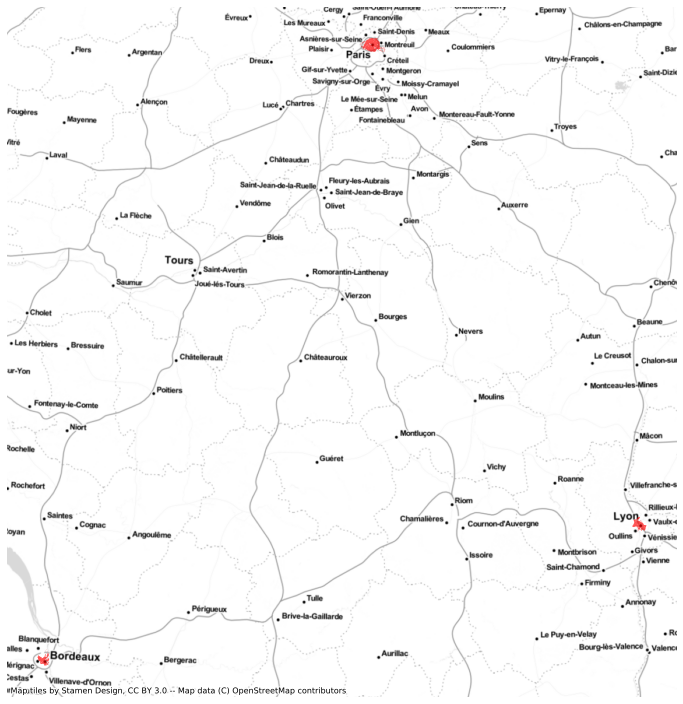

In [125]:
ax = geodf_filosofi.plot(markersize=0.5, figsize=(12,14), color='red') #figsize définit la taille de la carte
ax.set_axis_off()
cx.add_basemap(ax, crs=2154, source=cx.providers.Stamen.TonerLite)


Caroyage de densité de RBNB


In [126]:
geodf_paris_filosofi.drop('index_right', axis=1, inplace=True) # pour éviter un bug avec le sjoin 

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
geodf_paris_listings['densite']=1

In [140]:
geodf_paris_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [128]:
geodf_paris_listings.head()

id                        listing_url       scrape_id last_scraped  \
0  2577  https://www.airbnb.com/rooms/2577  20210410122610   2021-04-14   
1  3109  https://www.airbnb.com/rooms/3109  20210410122610   2021-04-13   
2  5396  https://www.airbnb.com/rooms/5396  20210410122610   2021-04-16   
3  7397  https://www.airbnb.com/rooms/7397  20210410122610   2021-04-16   
4  7964  https://www.airbnb.com/rooms/7964  20210410122610   2021-04-13   

                                name  \
0   Loft for 4 by Canal Saint Martin   
1                       zen and calm   
2     Explore the heart of old Paris   
3   MARAIS - 2ROOMS APT - 2/4 PEOPLE   
4  Large & sunny flat with balcony !   

                                         description  \
0  100 m2 loft (1100 sq feet) with high ceiling, ...   
1  <b>The space</b><br />I bedroom appartment in ...   
2  Cozy, well-appointed and graciously designed s...   
3  VERY CONVENIENT, WITH THE BEST LOCATION !<br /...   
4  Very large & nice apartment all for you! <br /...   

                               neighborhood_overview  \
0                                                NaN   
1  Good restaurants<br />very close the Montparna...   
2  You are within walking distance to the Louvre,...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/09da057c-0120...     2827   
1  https://a0.muscache.com/pictures/baeae9e2-cd53...     3631   
2  https://a0.muscache.com/pictures/52413/f9bf76f...     7903   
3  https://a0.muscache.com/pictures/67928287/330b...     2626   
4  https://a0.muscache.com/pictures/4471349/6fb3d...    22155   

                                  host_url  ... review_scores_value  \
0   https://www.airbnb.com/users/show/2827  ...                10.0   
1   https://www.airbnb.com/users/show/3631  ...                10.0   
2   https://www.airbnb.com/users/show/7903  ...                 9.0   
3   https://www.airbnb.com/users/show/2626  ...                10.0   
4  https://www.airbnb.com/users/show/22155  ...                10.0   

         license instant_bookable calculated_host_listings_count  \
0            NaN                f                              1   
1            NaN                f                              1   
2  7510402838018                f                              1   
3  7510400829623                f                              1   
4  7510903576564                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              0.04   
1                                           0              0.17   
2                                           0              1.65   
3                                           0              2.23   
4                                           0              0.05   

                   geometry densite  
0  POINT (2.36127 48.86957)       1  
1  POINT (2.31870 48.83191)       1  
2  POINT (2.35835 48.85247)       1  
3  POINT (2.35315 48.85909)       1  
4  POINT (2.34245 48.87417)       1  

[5 rows x 76 columns]

In [129]:
geodf_paris_filosofi.head()

IdINSPIRE                       Id_carr1km  I_est_cr  \
0  CRS3035RES200mN2893400E3763200  CRS3035RES1000mN2893000E3763000         0   
1  CRS3035RES200mN2890000E3762200  CRS3035RES1000mN2890000E3762000         0   
2  CRS3035RES200mN2893400E3762400  CRS3035RES1000mN2893000E3762000         0   
3  CRS3035RES200mN2891800E3763600  CRS3035RES1000mN2891000E3763000         0   
4  CRS3035RES200mN2890800E3763200  CRS3035RES1000mN2890000E3763000         0   

                         Id_carr_n  Groupe Depcom  I_pauv  \
0  CRS3035RES1000mN2893000E3763000  866132  75119       0   
1   CRS3035RES200mN2890000E3762200  862504  75111       0   
2  CRS3035RES1000mN2893000E3762000  866107  75119       0   
3   CRS3035RES200mN2891800E3763600  862421  75119       0   
4   CRS3035RES200mN2890800E3763200  862464  75120       0   

                       Id_car2010     Ind    Men  ...  typo_au10  duu10   z10  \
0  CRS3035RES200mN2893400E3763200  2818.5  990.0  ...        111  00851  1101   
1  CRS3035RES200mN2890000E3762200  1543.5  926.0  ...        111  00851  1101   
2  CRS3035RES200mN2893400E3762400  1338.0  508.0  ...        111  00851  1101   
3  CRS3035RES200mN2891800E3763600  1235.5  633.0  ...        111  00851  1101   
4  CRS3035RES200mN2890800E3763200   685.0  349.0  ...        111  00851  1101   

         epc     bv  cdcte  dep  reg   surf  \
0  200054781  75056    75C   75   11  105.4   
1  200054781  75056    75C   75   11  105.4   
2  200054781  75056    75C   75   11  105.4   
3  200054781  75056    75C   75   11  105.4   
4  200054781  75056    75C   75   11  105.4   

                                            geometry  
0  POLYGON ((654521.895 6866162.148, 654503.215 6...  
1  POLYGON ((653843.375 6862684.192, 653824.700 6...  
2  POLYGON ((653725.054 6866085.739, 653706.372 6...  
3  POLYGON ((655069.741 6864608.596, 655051.064 6...  
4  POLYGON ((654764.705 6863575.557, 654746.030 6...  

[5 rows x 54 columns]

In [142]:
temp = gpd.sjoin(geodf_paris_listings, geodf_paris_filosofi, how="inner", op='intersects')

In [143]:
temp.head()

id                           listing_url       scrape_id  \
0        2577     https://www.airbnb.com/rooms/2577  20210410122610   
1128   733727   https://www.airbnb.com/rooms/733727  20210410122610   
4106  3054999  https://www.airbnb.com/rooms/3054999  20210410122610   
4588  3347332  https://www.airbnb.com/rooms/3347332  20210410122610   
4716  3417808  https://www.airbnb.com/rooms/3417808  20210410122610   

     last_scraped                                               name  \
0      2021-04-14                   Loft for 4 by Canal Saint Martin   
1128   2021-04-13  60 m2 quiet, charm, comfort, in the heart of P...   
4106   2021-04-13  Appartement 3 pièces quartier République/St Ma...   
4588   2021-04-13                Charming50m2Republique/Canal/Marais   
4716   2021-04-16                  Appartement familial très central   

                                            description  \
0     100 m2 loft (1100 sq feet) with high ceiling, ...   
1128  If you appreciate the space (60 m2), the calm ...   
4106  Ce charmant 3 pièces peut accueillir deux  per...   
4588  2 rooms, in central République district. Close...   
4716  Appartement familial de 4 pièces (90m2) très c...   

                                  neighborhood_overview  \
0                                                   NaN   
1128  Atmosphere Neighborhood:<br />On the street th...   
4106  Quartier très agréable à vivre et très vivant....   
4588  You will love the new République square, with ...   
4716  La proximité des commerces, des restaurants. L...   

                                            picture_url   host_id  \
0     https://a0.muscache.com/pictures/09da057c-0120...      2827   
1128  https://a0.muscache.com/pictures/10090017/59a4...   3823728   
4106  https://a0.muscache.com/pictures/2759f3d6-0991...  13019393   
4588  https://a0.muscache.com/pictures/439469e9-6082...  16893953   
4716  https://a0.muscache.com/pictures/2d72c5ca-76de...  13657730   

                                        host_url  ... dau10 typo_au10  duu10  \
0         https://www.airbnb.com/users/show/2827  ...   001       111  00851   
1128   https://www.airbnb.com/users/show/3823728  ...   001       111  00851   
4106  https://www.airbnb.com/users/show/13019393  ...   001       111  00851   
4588  https://www.airbnb.com/users/show/16893953  ...   001       111  00851   
4716  https://www.airbnb.com/users/show/13657730  ...   001       111  00851   

       z10        epc     bv cdcte dep reg   surf  
0     1101  200054781  75056   75C  75  11  105.4  
1128  1101  200054781  75056   75C  75  11  105.4  
4106  1101  200054781  75056   75C  75  11  105.4  
4588  1101  200054781  75056   75C  75  11  105.4  
4716  1101  200054781  75056   75C  75  11  105.4  

[5 rows x 130 columns]

In [144]:
geo_paris_densite_rbnb = temp.groupby(['IdINSPIRE'], as_index=False)['densite'].sum()
geo_paris_densite_rbnb.densite = geo_paris_densite_rbnb.densite / 0.2**2

In [145]:
geo_paris_densite_rbnb = geodf_paris_filosofi.merge(geo_paris_densite_rbnb, on = 'IdINSPIRE')

(6857121.84, 6867229.71)

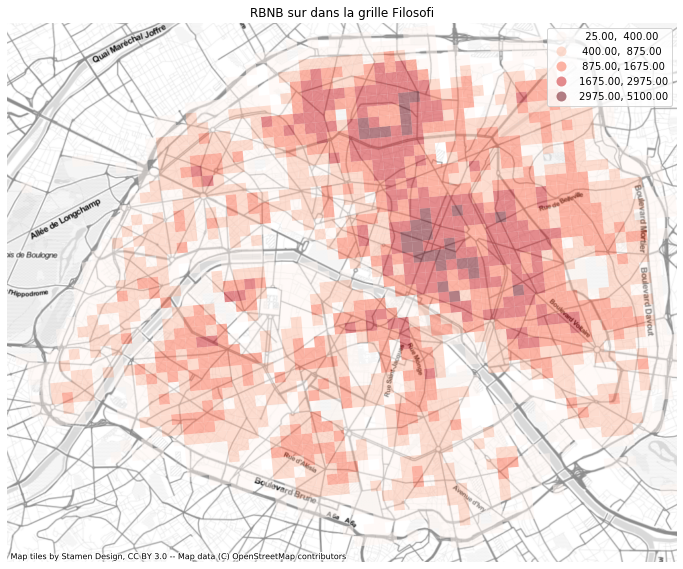

In [146]:
ax = geo_paris_densite_rbnb.plot('densite', figsize=(12,14), legend=True, scheme='FisherJenksSampled', cmap='Reds', alpha=0.5)
ax.set_axis_off()
cx.add_basemap(ax, crs=2154, source=cx.providers.Stamen.TonerLite)
ax.set_title("RBNB sur dans la grille Filosofi")
ax.set_xlim((644601.05,657161.71))
ax.set_ylim((6857121.84,6867229.71))